# Introduction to Julia Programming VI

### Data science: Data preprocessing and visualization

**by Yueh-Hua Tu**

# Outline

* Missings
* DataFrames
* Query
* Gadfly

請先安裝套件： Pkg.add("DataFrames")

* DataFrames
* CSV
* Missings
* CategoricalArrays
* Query
* RDatasets
* Distributions
* Gadfly

In [1]:
using DataFrames, CSV, Missings, CategoricalArrays, Query
using RDatasets
using Gadfly

## Basic

### *missing*

* `missing`是用來表示一個遺失的資料點，如同`NULL`
* `missing`是`Missing`的唯一物件實體
* 包含`missing`的運算，當結果無法確定的時候都會回傳`missing`

In [2]:
true && missing

missing

In [3]:
1 + missing

missing

### 短路邏輯

In [4]:
false && missing

false

In [5]:
true || missing

true

In [6]:
ismissing(missing)

true

### *DataFrame*

* `DataFrame`是一種表格狀的資料結構，他可以處理遺失值
* 每個行必須是相同長度

In [7]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])  # 連同資料一起初始化

4×2 DataFrames.DataFrame
│ Row │ A │ B   │
├─────┼───┼─────┤
│ 1   │ 1 │ "M" │
│ 2   │ 2 │ "F" │
│ 3   │ 3 │ "F" │
│ 4   │ 4 │ "M" │

In [8]:
df = DataFrame()  # 先初始化一個空的，再放入資料
df[:A] = 1:8
df[:B] = ["M", "F", "F", "M", "F", "M", "M", "F"]
df

8×2 DataFrames.DataFrame
│ Row │ A │ B   │
├─────┼───┼─────┤
│ 1   │ 1 │ "M" │
│ 2   │ 2 │ "F" │
│ 3   │ 3 │ "F" │
│ 4   │ 4 │ "M" │
│ 5   │ 5 │ "F" │
│ 6   │ 6 │ "M" │
│ 7   │ 7 │ "M" │
│ 8   │ 8 │ "F" │

#### 用數字索引

In [9]:
df[1, 1]

1

#### 用欄位（Symbol type）索引

In [10]:
df[1, :A]

1

#### 取得維度資訊

In [11]:
size(df)

(8, 2)

#### 列數

In [12]:
nrow(df)

8

#### 行數

In [13]:
ncol(df)

2

#### 取得欄位名稱

In [14]:
names(df)

2-element Array{Symbol,1}:
 :A
 :B

In [15]:
df[1:3, :]  # 取1~3列，跟所有欄位

3×2 DataFrames.DataFrame
│ Row │ A │ B   │
├─────┼───┼─────┤
│ 1   │ 1 │ "M" │
│ 2   │ 2 │ "F" │
│ 3   │ 3 │ "F" │

In [16]:
df[1:3, [:B, :A]]  # 取1~3列，跟指定欄位

3×2 DataFrames.DataFrame
│ Row │ B   │ A │
├─────┼─────┼───┤
│ 1   │ "M" │ 1 │
│ 2   │ "F" │ 2 │
│ 3   │ "F" │ 3 │

In [17]:
df[df[:A] % 2 .== 0, :]  # 取符合條件的列，跟所有欄位

4×2 DataFrames.DataFrame
│ Row │ A │ B   │
├─────┼───┼─────┤
│ 1   │ 2 │ "F" │
│ 2   │ 4 │ "M" │
│ 3   │ 6 │ "M" │
│ 4   │ 8 │ "F" │

In [18]:
mean(df[1])  # 對第1列取平均

4.5

In [19]:
median(df[:A])  # 對第一個欄位取中位數

4.5

In [20]:
df = DataFrame(A = 1:4, B = randn(4))
colwise(cumsum, df)

2-element Array{Any,1}:
 DataArrays.DataArray{Int64,1}[[1, 3, 6, 10]]                              
 DataArrays.DataArray{Float64,1}[[-0.954122, -3.28118, -3.38944, -1.90399]]

#### 直接把資料貼上來讀成DataFrame

In [21]:
df = csv"""
    name,  age, squidPerWeek
    Alice,  36,         3.14
    Bob,    24,         0
    Carol,  58,         2.71
    Eve,    49,         7.77
"""

4×3 DataFrames.DataFrame
│ Row │ name    │ age │ squidPerWeek │
├─────┼─────────┼─────┼──────────────┤
│ 1   │ "Alice" │ 36  │ 3.14         │
│ 2   │ "Bob"   │ 24  │ 0.0          │
│ 3   │ "Carol" │ 58  │ 2.71         │
│ 4   │ "Eve"   │ 49  │ 7.77         │

In [22]:
CSV.read("/home/pika/test.csv")

4×3 DataFrames.DataFrame
│ Row │ name        │   age │  squidPerWeek │
├─────┼─────────────┼───────┼───────────────┤
│ 1   │ "    Alice" │ 36    │ 3.14          │
│ 2   │ "    Bob"   │ 24    │ 0.0           │
│ 3   │ "    Carol" │ 58    │ 2.71          │
│ 4   │ "    Eve"   │ 49    │ 7.77          │

In [23]:
df = CSV.read("/home/pika/test.csv", nullable=false, weakrefstrings=false)

4×3 DataFrames.DataFrame
│ Row │ name        │   age │  squidPerWeek │
├─────┼─────────────┼───────┼───────────────┤
│ 1   │ "    Alice" │ 36    │ 3.14          │
│ 2   │ "    Bob"   │ 24    │ 0.0           │
│ 3   │ "    Carol" │ 58    │ 2.71          │
│ 4   │ "    Eve"   │ 49    │ 7.77          │

那我們就來實際用DataFrame玩玩看資料吧！

In [24]:
head(RDatasets.datasets())  # 可以選你要的資料集

6×5 DataFrames.DataFrame
│ Row │ Package │ Dataset     │ Title       │ Rows │ Columns │
├─────┼─────────┼─────────────┼─────────────┼──────┼─────────┤
│ 1   │ "COUNT" │ "affairs"   │ "affairs"   │ 601  │ 18      │
│ 2   │ "COUNT" │ "azdrg112"  │ "azdrg112"  │ 1798 │ 4       │
│ 3   │ "COUNT" │ "azpro"     │ "azpro"     │ 3589 │ 6       │
│ 4   │ "COUNT" │ "badhealth" │ "badhealth" │ 1127 │ 3       │
│ 5   │ "COUNT" │ "fasttrakg" │ "fasttrakg" │ 15   │ 9       │
│ 6   │ "COUNT" │ "lbw"       │ "lbw"       │ 189  │ 10      │

In [25]:
iris = dataset("datasets", "iris")
head(iris)

6×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species  │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa" │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa" │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa" │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa" │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa" │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa" │

In [26]:
size(iris)  # 看一下他有幾列幾行

(150, 5)

#### 把兩個相同的DataFrame垂直地併起來

In [27]:
size(vcat(iris, iris))

(300, 5)

#### 把兩個相同的DataFrame水平地併起來

In [28]:
size(hcat(iris, iris))

(150, 10)

#### 看看每列是不是有出現missing，true代表沒有出現

In [29]:
completecases(iris)

150-element DataArrays.DataArray{Bool,1}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

#### 選出那些完整的列

In [30]:
head(iris[completecases(iris), :], 10)  # 跟complete_cases!(iris)一樣

10×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species  │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa" │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa" │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa" │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa" │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa" │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa" │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ "setosa" │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ "setosa" │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ "setosa" │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ "setosa" │

#### 或是你想要唯一的列元素組合

In [31]:
head(unique(iris), 10)

10×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species  │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa" │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa" │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa" │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa" │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa" │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa" │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ "setosa" │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ "setosa" │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ "setosa" │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ "setosa" │

In [32]:
iris[:PetalArea] = iris[:PetalLength] .* iris[:PetalWidth]
head(iris)

6×6 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species  │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ "setosa" │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ "setosa" │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa" │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa" │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ "setosa" │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ "setosa" │

│ Row │ PetalArea │
├─────┼───────────┤
│ 1   │ 0.28      │
│ 2   │ 0.28      │
│ 3   │ 0.26      │
│ 4   │ 0.3       │
│ 5   │ 0.28      │
│ 6   │ 0.68      │

#### 對欄位做排序

In [33]:
head(sort!(iris, cols=:SepalLength), 10)

10×6 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species  │
├─────┼─────────────┼────────────┼─────────────┼────────────┼──────────┤
│ 1   │ 4.3         │ 3.0        │ 1.1         │ 0.1        │ "setosa" │
│ 2   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ "setosa" │
│ 3   │ 4.4         │ 3.0        │ 1.3         │ 0.2        │ "setosa" │
│ 4   │ 4.4         │ 3.2        │ 1.3         │ 0.2        │ "setosa" │
│ 5   │ 4.5         │ 2.3        │ 1.3         │ 0.3        │ "setosa" │
│ 6   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ "setosa" │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ "setosa" │
│ 8   │ 4.6         │ 3.6        │ 1.0         │ 0.2        │ "setosa" │
│ 9   │ 4.6         │ 3.2        │ 1.4         │ 0.2        │ "setosa" │
│ 10  │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ "setosa" │

│ Row │ PetalArea │
├─────┼───────────┤
│ 1   │ 0.11      │
│ 2   │ 0.28      │
│ 3   │ 0.26      │
│ 4   │ 0.26      │
│ 5   │ 0.39      │
│ 6   │ 0.3       │
│ 7   │ 0.42      │
│ 8   │ 0.2       │
│ 9   │ 0.28      │
│ 10  │ 0.26      │

#### 排序多個欄位，並指定是否倒序

In [34]:
head(sort!(iris, cols=(:Species, :SepalLength, :SepalWidth), rev=(true, false, false)), 10)

10×6 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species     │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┤
│ 1   │ 4.9         │ 2.5        │ 4.5         │ 1.7        │ "virginica" │
│ 2   │ 5.6         │ 2.8        │ 4.9         │ 2.0        │ "virginica" │
│ 3   │ 5.7         │ 2.5        │ 5.0         │ 2.0        │ "virginica" │
│ 4   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 5   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 6   │ 5.8         │ 2.8        │ 5.1         │ 2.4        │ "virginica" │
│ 7   │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ "virginica" │
│ 8   │ 6.0         │ 2.2        │ 5.0         │ 1.5        │ "virginica" │
│ 9   │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ "virginica" │
│ 10  │ 6.1         │ 2.6        │ 5.6         │ 1.4        │ "virginica" │

│ Row │ PetalArea │
├─────┼───────────┤
│ 1   │ 7.65      │
│ 2   │ 9.8       │
│ 3   │ 10.0      │
│ 4   │ 9.69      │
│ 5   │ 9.69      │
│ 6   │ 12.24     │
│ 7   │ 9.18      │
│ 8   │ 7.5       │
│ 9   │ 8.64      │
│ 10  │ 7.84      │

## Join

In [35]:
names = DataFrame(ID = [1, 2, 3], Name = ["John Doe", "Jane Doe", "Andy Doe"])

3×2 DataFrames.DataFrame
│ Row │ ID │ Name       │
├─────┼────┼────────────┤
│ 1   │ 1  │ "John Doe" │
│ 2   │ 2  │ "Jane Doe" │
│ 3   │ 3  │ "Andy Doe" │

In [36]:
jobs = DataFrame(ID = [1, 2, 4], Job = ["Lawyer", "Doctor", "Chief"])

3×2 DataFrames.DataFrame
│ Row │ ID │ Job      │
├─────┼────┼──────────┤
│ 1   │ 1  │ "Lawyer" │
│ 2   │ 2  │ "Doctor" │
│ 3   │ 4  │ "Chief"  │

#### Inner join

inner join會輸出左表跟右表都包含的列

In [37]:
full = join(names, jobs, on = :ID)

2×3 DataFrames.DataFrame
│ Row │ ID │ Name       │ Job      │
├─────┼────┼────────────┼──────────┤
│ 1   │ 1  │ "John Doe" │ "Lawyer" │
│ 2   │ 2  │ "Jane Doe" │ "Doctor" │

#### Left join會輸出以左表為主包含的列

In [38]:
left_join = join(names, jobs, on = :ID, kind = :left)

3×3 DataFrames.DataFrame
│ Row │ ID │ Name       │ Job      │
├─────┼────┼────────────┼──────────┤
│ 1   │ 1  │ "John Doe" │ "Lawyer" │
│ 2   │ 2  │ "Jane Doe" │ "Doctor" │
│ 3   │ 3  │ "Andy Doe" │ NA       │

#### Right join會輸出右表為主包含的列

In [39]:
right_join = join(names, jobs, on = :ID, kind = :right)

3×3 DataFrames.DataFrame
│ Row │ Name       │ ID │ Job      │
├─────┼────────────┼────┼──────────┤
│ 1   │ "John Doe" │ 1  │ "Lawyer" │
│ 2   │ "Jane Doe" │ 2  │ "Doctor" │
│ 3   │ NA         │ 4  │ "Chief"  │

#### Outer join會輸出左表或是右表包含的列

In [40]:
outer_join = join(names, jobs, on = :ID, kind = :outer)

4×3 DataFrames.DataFrame
│ Row │ ID │ Name       │ Job      │
├─────┼────┼────────────┼──────────┤
│ 1   │ 1  │ "John Doe" │ "Lawyer" │
│ 2   │ 2  │ "Jane Doe" │ "Doctor" │
│ 3   │ 3  │ "Andy Doe" │ NA       │
│ 4   │ 4  │ NA         │ "Chief"  │

其他的join:

* Semi join: 類似inner join，但輸出只限於左表的行而已
* Anti join: 輸出的列是key在左表存在，但右表不存在
* Cross join: 輸出是左表跟右表所有列的所有排列組合 (Cartesian product)

In [41]:
cross_join = join(names, jobs, kind = :cross)  # 不需要key

9×4 DataFrames.DataFrame
│ Row │ ID │ Name       │ ID_1 │ Job      │
├─────┼────┼────────────┼──────┼──────────┤
│ 1   │ 1  │ "John Doe" │ 1    │ "Lawyer" │
│ 2   │ 1  │ "John Doe" │ 2    │ "Doctor" │
│ 3   │ 1  │ "John Doe" │ 4    │ "Chief"  │
│ 4   │ 2  │ "Jane Doe" │ 1    │ "Lawyer" │
│ 5   │ 2  │ "Jane Doe" │ 2    │ "Doctor" │
│ 6   │ 2  │ "Jane Doe" │ 4    │ "Chief"  │
│ 7   │ 3  │ "Andy Doe" │ 1    │ "Lawyer" │
│ 8   │ 3  │ "Andy Doe" │ 2    │ "Doctor" │
│ 9   │ 3  │ "Andy Doe" │ 4    │ "Chief"  │

## Split-Apply-Combine Strategy

除了可以像資料庫一樣join，還有運算的策略：

* 拆分：把資料依據某一欄位拆分成幾個群
* 套用：在每群資料上運算一些函式
* 合併：合併運算結果

#### 根據不同`:Species`，去計算`iris`上的`size()`

> 參數:
> 1. DataFrame
> 2. 針對一個column去拆分DataFrame
> 3. 會對每個群進行運算的一個function或是expression

In [42]:
by(iris, :Species, size)

3×2 DataFrames.DataFrame
│ Row │ Species      │ x1      │
├─────┼──────────────┼─────────┤
│ 1   │ "setosa"     │ (50, 6) │
│ 2   │ "versicolor" │ (50, 6) │
│ 3   │ "virginica"  │ (50, 6) │

#### 用在複雜的function的情況

In [43]:
by(iris, :Species) do df
    DataFrame(μ = mean(df[:PetalLength]), σ = var(df[:PetalLength]))
end

3×3 DataFrames.DataFrame
│ Row │ Species      │ μ     │ σ         │
├─────┼──────────────┼───────┼───────────┤
│ 1   │ "setosa"     │ 1.462 │ 0.0301592 │
│ 2   │ "versicolor" │ 4.26  │ 0.220816  │
│ 3   │ "virginica"  │ 5.552 │ 0.304588  │

#### 以`:Species`分群，計算總和跟平均

> 參數:
> 1. DataFrame
> 2. 針對一個或多個column去拆分DataFrame
> 3. 會對每個群進行運算的多個function或是expression

In [44]:
aggregate(iris, :Species, [sum, mean])

3×11 DataFrames.DataFrame
│ Row │ Species      │ SepalLength_sum │ SepalLength_mean │ SepalWidth_sum │
├─────┼──────────────┼─────────────────┼──────────────────┼────────────────┤
│ 1   │ "setosa"     │ 250.3           │ 5.006            │ 171.4          │
│ 2   │ "versicolor" │ 296.8           │ 5.936            │ 138.5          │
│ 3   │ "virginica"  │ 329.4           │ 6.588            │ 148.7          │

│ Row │ SepalWidth_mean │ PetalLength_sum │ PetalLength_mean │ PetalWidth_sum │
├─────┼─────────────────┼─────────────────┼──────────────────┼────────────────┤
│ 1   │ 3.428           │ 73.1            │ 1.462            │ 12.3           │
│ 2   │ 2.77            │ 213.0           │ 4.26             │ 66.3           │
│ 3   │ 2.974           │ 277.6           │ 5.552            │ 101.3          │

│ Row │ PetalWidth_mean │ PetalArea_sum │ PetalArea_mean │
├─────┼─────────────────┼───────────────┼────────────────┤
│ 1   │ 0.246           │ 18.28         │ 0.3656         │
│ 2   │ 1.326           │ 286.02        │ 5.7204         │
│ 3   │ 2.026           │ 564.81        │ 11.2962        │

#### 單純拆分資料

In [45]:
for subdf in groupby(iris, :Species)
    println(size(subdf, 1))
end

50
50
50


## Reshape

### 原來的資料是"寬型"的表格型態 (wide format)

In [46]:
iris[:id] = 1:size(iris, 1)
head(iris, 10)

10×7 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species     │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────────┤
│ 1   │ 4.9         │ 2.5        │ 4.5         │ 1.7        │ "virginica" │
│ 2   │ 5.6         │ 2.8        │ 4.9         │ 2.0        │ "virginica" │
│ 3   │ 5.7         │ 2.5        │ 5.0         │ 2.0        │ "virginica" │
│ 4   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 5   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ "virginica" │
│ 6   │ 5.8         │ 2.8        │ 5.1         │ 2.4        │ "virginica" │
│ 7   │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ "virginica" │
│ 8   │ 6.0         │ 2.2        │ 5.0         │ 1.5        │ "virginica" │
│ 9   │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ "virginica" │
│ 10  │ 6.1         │ 2.6        │ 5.6         │ 1.4        │ "virginica" │

│ Row │ PetalArea │ id │
├─────┼───────────┼────┤
│ 1   │ 7.65      │ 1  │
│ 2   │ 9.8       │ 2  │
│ 3   │ 10.0      │ 3  │
│ 4   │ 9.69      │ 4  │
│ 5   │ 9.69      │ 5  │
│ 6   │ 12.24     │ 6  │
│ 7   │ 9.18      │ 7  │
│ 8   │ 7.5       │ 8  │
│ 9   │ 8.64      │ 9  │
│ 10  │ 7.84      │ 10 │

### 將指定的欄位併縮到資料中，變成"長型"的表格 (long format)

In [47]:
d = stack(iris, [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth])
head(d, 10)

10×5 DataFrames.DataFrame
│ Row │ variable    │ value │ Species     │ PetalArea │ id │
├─────┼─────────────┼───────┼─────────────┼───────────┼────┤
│ 1   │ SepalLength │ 4.9   │ "virginica" │ 7.65      │ 1  │
│ 2   │ SepalLength │ 5.6   │ "virginica" │ 9.8       │ 2  │
│ 3   │ SepalLength │ 5.7   │ "virginica" │ 10.0      │ 3  │
│ 4   │ SepalLength │ 5.8   │ "virginica" │ 9.69      │ 4  │
│ 5   │ SepalLength │ 5.8   │ "virginica" │ 9.69      │ 5  │
│ 6   │ SepalLength │ 5.8   │ "virginica" │ 12.24     │ 6  │
│ 7   │ SepalLength │ 5.9   │ "virginica" │ 9.18      │ 7  │
│ 8   │ SepalLength │ 6.0   │ "virginica" │ 7.5       │ 8  │
│ 9   │ SepalLength │ 6.0   │ "virginica" │ 8.64      │ 9  │
│ 10  │ SepalLength │ 6.1   │ "virginica" │ 7.84      │ 10 │

### 併縮指定的欄位，並選擇其他欄位

In [48]:
d = stack(iris, [:SepalLength, :SepalWidth], :Species)
head(d, 10)

10×3 DataFrames.DataFrame
│ Row │ variable    │ value │ Species     │
├─────┼─────────────┼───────┼─────────────┤
│ 1   │ SepalLength │ 4.9   │ "virginica" │
│ 2   │ SepalLength │ 5.6   │ "virginica" │
│ 3   │ SepalLength │ 5.7   │ "virginica" │
│ 4   │ SepalLength │ 5.8   │ "virginica" │
│ 5   │ SepalLength │ 5.8   │ "virginica" │
│ 6   │ SepalLength │ 5.8   │ "virginica" │
│ 7   │ SepalLength │ 5.9   │ "virginica" │
│ 8   │ SepalLength │ 6.0   │ "virginica" │
│ 9   │ SepalLength │ 6.0   │ "virginica" │
│ 10  │ SepalLength │ 6.1   │ "virginica" │

### 將長型表格轉為寬型

第2個參數是可辨識列的欄位，第3、4個參數分別是併縮時的欄位名跟值

In [49]:
d = stack(iris, [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth])
head(unstack(d, :id, :variable, :value), 10)

10×5 DataFrames.DataFrame
│ Row │ id │ PetalLength │ PetalWidth │ SepalLength │ SepalWidth │
├─────┼────┼─────────────┼────────────┼─────────────┼────────────┤
│ 1   │ 1  │ 4.5         │ 1.7        │ 4.9         │ 2.5        │
│ 2   │ 2  │ 4.9         │ 2.0        │ 5.6         │ 2.8        │
│ 3   │ 3  │ 5.0         │ 2.0        │ 5.7         │ 2.5        │
│ 4   │ 4  │ 5.1         │ 1.9        │ 5.8         │ 2.7        │
│ 5   │ 5  │ 5.1         │ 1.9        │ 5.8         │ 2.7        │
│ 6   │ 6  │ 5.1         │ 2.4        │ 5.8         │ 2.8        │
│ 7   │ 7  │ 5.1         │ 1.8        │ 5.9         │ 3.0        │
│ 8   │ 8  │ 5.0         │ 1.5        │ 6.0         │ 2.2        │
│ 9   │ 9  │ 4.8         │ 1.8        │ 6.0         │ 3.0        │
│ 10  │ 10 │ 5.6         │ 1.4        │ 6.1         │ 2.6        │

### 若是其餘的欄位不重複，也可以不指定辨識欄位

In [50]:
head(unstack(d, :variable, :value), 10)

10×7 DataFrames.DataFrame
│ Row │ Species  │ PetalArea │ id  │ PetalLength │ PetalWidth │ SepalLength │
├─────┼──────────┼───────────┼─────┼─────────────┼────────────┼─────────────┤
│ 1   │ "setosa" │ 0.11      │ 101 │ 1.1         │ 0.1        │ 4.3         │
│ 2   │ "setosa" │ 0.14      │ 112 │ 1.4         │ 0.1        │ 4.8         │
│ 3   │ "setosa" │ 0.14      │ 120 │ 1.4         │ 0.1        │ 4.9         │
│ 4   │ "setosa" │ 0.15      │ 118 │ 1.5         │ 0.1        │ 4.9         │
│ 5   │ "setosa" │ 0.15      │ 139 │ 1.5         │ 0.1        │ 5.2         │
│ 6   │ "setosa" │ 0.2       │ 109 │ 1.0         │ 0.2        │ 4.6         │
│ 7   │ "setosa" │ 0.24      │ 122 │ 1.2         │ 0.2        │ 5.0         │
│ 8   │ "setosa" │ 0.24      │ 150 │ 1.2         │ 0.2        │ 5.8         │
│ 9   │ "setosa" │ 0.26      │ 103 │ 1.3         │ 0.2        │ 4.4         │
│ 10  │ "setosa" │ 0.26      │ 104 │ 1.3         │ 0.2        │ 4.4         │

│ Row │ SepalWidth │
├─────┼────────────┤
│ 1   │ 3.0        │
│ 2   │ 3.0        │
│ 3   │ 3.6        │
│ 4   │ 3.1        │
│ 5   │ 4.1        │
│ 6   │ 3.6        │
│ 7   │ 3.2        │
│ 8   │ 4.0        │
│ 9   │ 3.0        │
│ 10  │ 3.2        │

### 綜合應用

對不同的:Species，分別計算他們各項特徵的平均

In [51]:
d = stack(iris)
x = by(d, [:variable, :Species], df -> DataFrame(vsum = mean(df[:value])))
unstack(x, :Species, :vsum)

5×4 DataFrames.DataFrame
│ Row │ variable    │ setosa │ versicolor │ virginica │
├─────┼─────────────┼────────┼────────────┼───────────┤
│ 1   │ PetalArea   │ 0.3656 │ 5.7204     │ 11.2962   │
│ 2   │ PetalLength │ 1.462  │ 4.26       │ 5.552     │
│ 3   │ PetalWidth  │ 0.246  │ 1.326      │ 2.026     │
│ 4   │ SepalLength │ 5.006  │ 5.936      │ 6.588     │
│ 5   │ SepalWidth  │ 3.428  │ 2.77       │ 2.974     │

## Query

In [52]:
df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

3×3 DataFrames.DataFrame
│ Row │ name    │ age  │ children │
├─────┼─────────┼──────┼──────────┤
│ 1   │ "John"  │ 23.0 │ 3        │
│ 2   │ "Sally" │ 42.0 │ 5        │
│ 3   │ "Kirk"  │ 59.0 │ 2        │

### select-from-where

In [53]:
x = @from i in df begin
    @where i.age>50
    @select {i.name, i.children}
    @collect DataFrame
end

1×2 DataFrames.DataFrame
│ Row │ name   │ children │
├─────┼────────┼──────────┤
│ 1   │ "Kirk" │ 2        │

### Sorting

In [54]:
df = DataFrame(a=[2,1,1,2,1,3],b=[2,2,1,1,3,2])

x = @from i in df begin
    @orderby descending(i.a), i.b
    @select i
    @collect DataFrame
end

6×2 DataFrames.DataFrame
│ Row │ a │ b │
├─────┼───┼───┤
│ 1   │ 3 │ 2 │
│ 2   │ 2 │ 1 │
│ 3   │ 2 │ 2 │
│ 4   │ 1 │ 1 │
│ 5   │ 1 │ 2 │
│ 6   │ 1 │ 3 │

### Filtering

In [55]:
df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

x = @from i in df begin
    @where i.age > 30. && i.children > 2
    @select i
    @collect DataFrame
end

1×3 DataFrames.DataFrame
│ Row │ name    │ age  │ children │
├─────┼─────────┼──────┼──────────┤
│ 1   │ "Sally" │ 42.0 │ 5        │

### Projecting

In [56]:
data = [1,2,3]

x = @from i in data begin
    @select i^2
    @collect
end

3-element Array{Int64,1}:
 1
 4
 9

### Flattening

In [57]:
source = Dict(:a=>[1,2,3], :b=>[4,5])

q = @from i in source begin
    @from j in i.second
    @select {Key=i.first,Value=j}
    @collect DataFrame
end

5×2 DataFrames.DataFrame
│ Row │ Key │ Value │
├─────┼─────┼───────┤
│ 1   │ a   │ 1     │
│ 2   │ a   │ 2     │
│ 3   │ a   │ 3     │
│ 4   │ b   │ 4     │
│ 5   │ b   │ 5     │

### Grouping

In [58]:
df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,2,2])

x = @from i in df begin
    @group i by i.children into g
    @select {Key=g.key,Count=length(g)}
    @collect DataFrame
end

2×2 DataFrames.DataFrame
│ Row │ Key │ Count │
├─────┼─────┼───────┤
│ 1   │ 3   │ 1     │
│ 2   │ 2   │ 2     │

## Gadfly

### Plotting arrays

我們先從最簡單的Array開始，只要分別指定X跟Y的座標給他，他就可以幫你畫出圖來

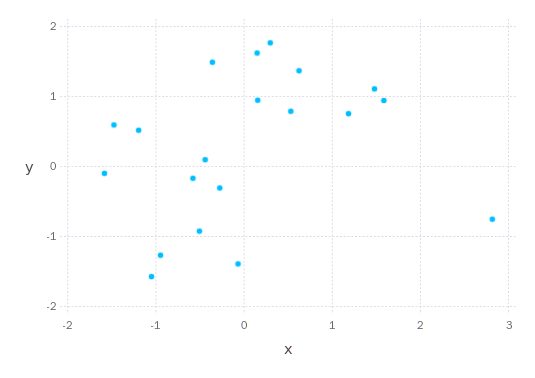

In [59]:
plot(x=randn(20), y=randn(20))

藉著我們要在上面加一些線，把這些點連起來，所以我們會用到兩個參數：

* Geom.point: 繪製點
* Geom.line: 繪製線，變成折線圖

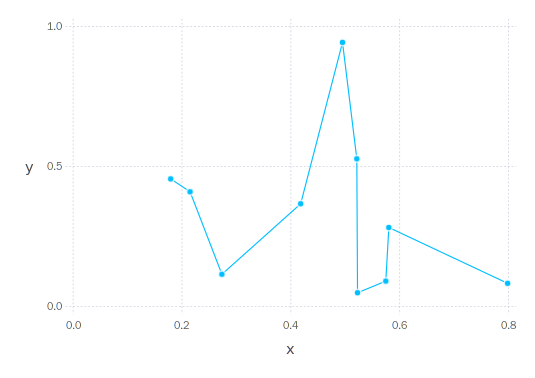

In [60]:
plot(x=rand(10), y=rand(10), Geom.point, Geom.line)

如果有需要調整軸的尺度或是操作標題跟軸線，可以用以下的參數：

* Scale: 操作軸的尺度
* Geom: 操作點跟線或是內容的呈現
* Guide: 增加標題跟軸的標示

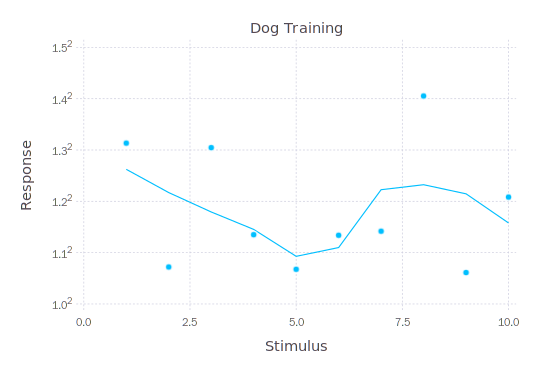

In [61]:
plot(x=1:10, y=2.^rand(10), Scale.y_sqrt, Geom.point, Geom.smooth,
     Guide.xlabel("Stimulus"), Guide.ylabel("Response"), Guide.title("Dog Training"))

當你把你要的圖畫好之後，就可以存成不同的檔案了

```julia
myplot = plot(..)

draw(SVG("myplot.svg", 4inch, 3inch), myplot)
draw(PNG("myplot.png", 4inch, 3inch), myplot)
draw(PDF("myplot.pdf", 4inch, 3inch), myplot)
draw(PS("myplot.ps", 4inch, 3inch), myplot)
draw(D3("myplot.js", 4inch, 3inch), myplot)
```

### Plotting data frames

當你的資料裝在`DataFrame`裡的時候，只要指定欄位名稱就可以了

注意，第一個是放**`DataFrame`**

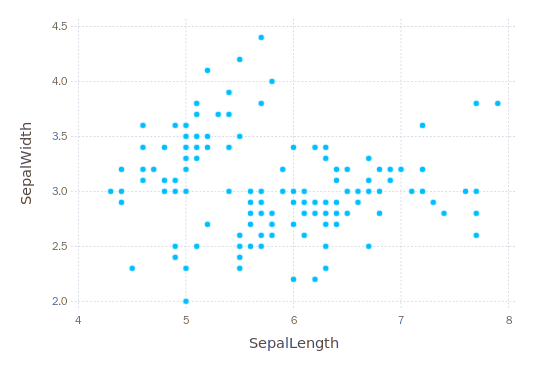

In [62]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth", Geom.point)

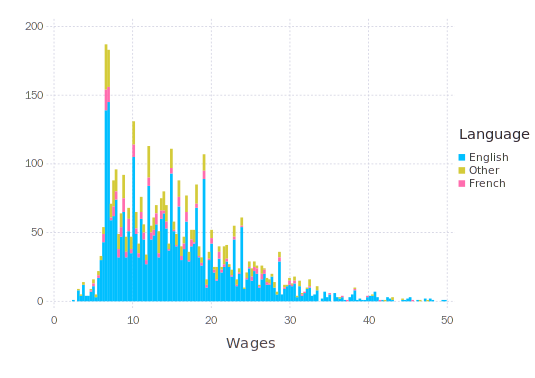

In [63]:
plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)

### Functions and Expressions

當你要畫的東西是function的話，那你就需要用到這邊的語法了

```julia
plot(f::Function, a, b, <其他東西>...)
```

a跟b分別是圖形的起始位置跟終點位置，以X軸計算

另一種是畫多個function：

```julia
plot(fs::Array, a, b, <其他東西>...)
```

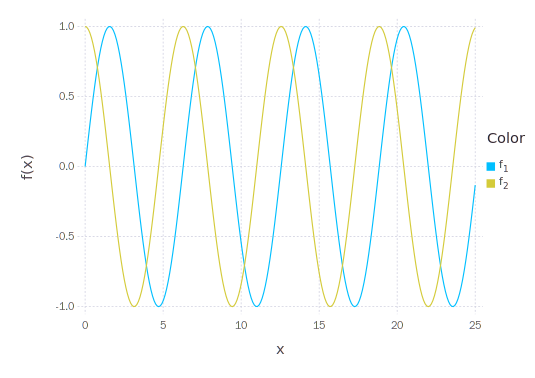

In [64]:
plot([sin, cos], 0, 25)

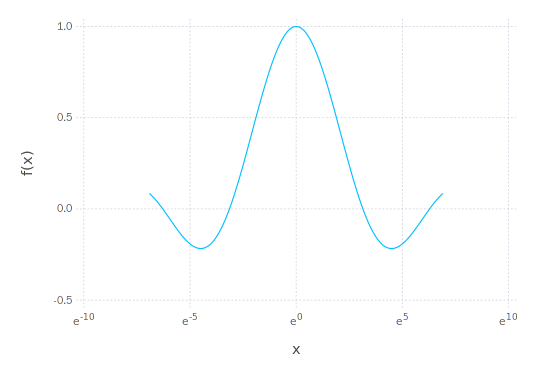

In [65]:
plot((x) -> sin(x)/x, 0.001, 1000, Scale.x_log)

### Layers

當你需要在同一張上畫很多圖，而且他們是疊起來的，你需要用到layer這東西

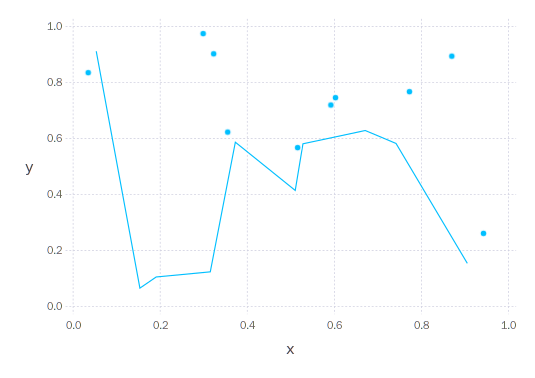

In [66]:
plot(layer(x=rand(10), y=rand(10), Geom.point), layer(x=rand(10), y=rand(10), Geom.line))

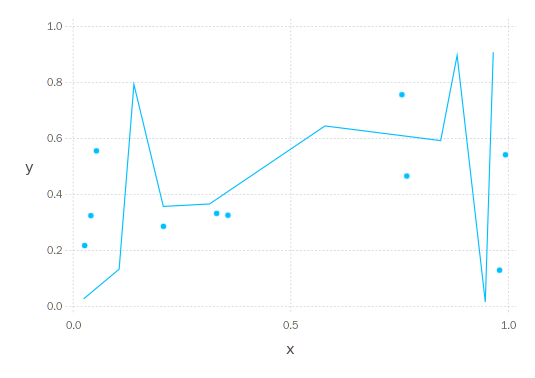

In [67]:
layer1 = layer(x=rand(10), y=rand(10), Geom.point)
layer2 = layer(x=rand(10), y=rand(10), Geom.line)
plot(layer1, layer2)

### Geom

接下來介紹一下常用的圖

#### *呈現一維資料*

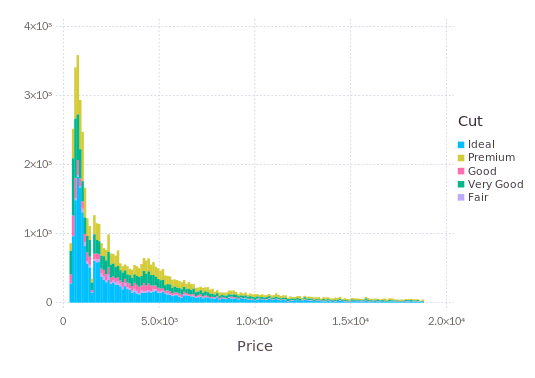

In [68]:
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.histogram)

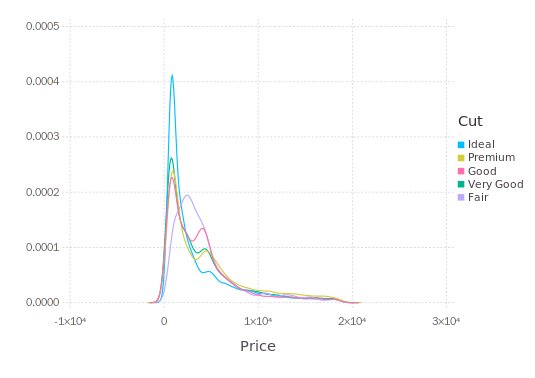

In [69]:
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.density)

#### *呈現二維資料*

二維的histogram，X跟Y分別是不同的維度，計數的多寡以顏色表示

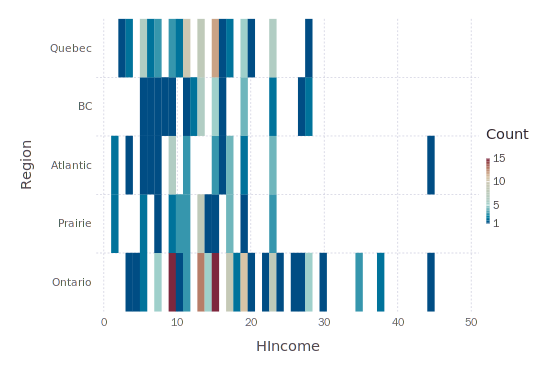

In [70]:
plot(dataset("car", "Womenlf"), x="HIncome", y="Region", Geom.histogram2d)

#### 數值對數值資料

In [71]:
using Distributions

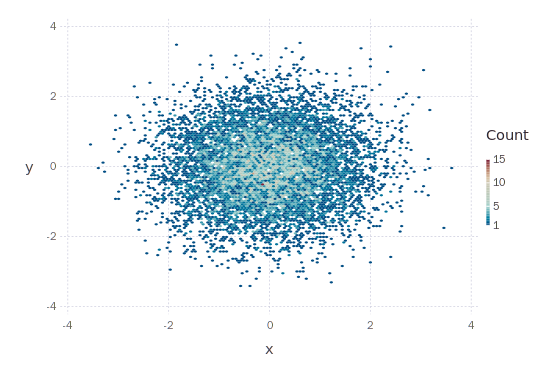

In [72]:
mn = MultivariateNormal([0.0, 0.0], [1.0 0.01; 0.01 1.0])
X = rand(mn, 10000)
plot(x=X[1,:], y=X[2,:], Geom.hexbin)  # 每個格子用六角蜂巢狀表示

#### 適合用來表達二維的函數圖形（等高線圖、梯度）

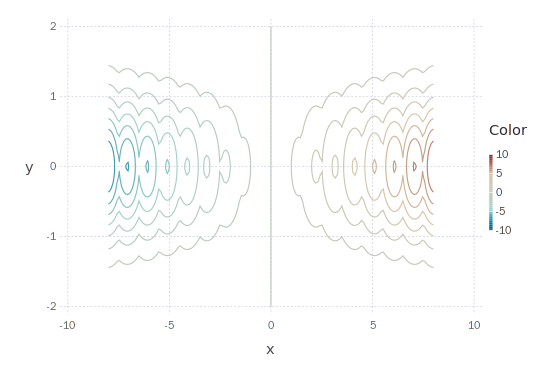

In [73]:
plot(z=(x,y) -> x*exp(-(x-round(Int, x))^2-y^2),
     x=linspace(-8,8,150), y=linspace(-2,2,150), Geom.contour)

#### 也適合拿來畫等高線地形圖

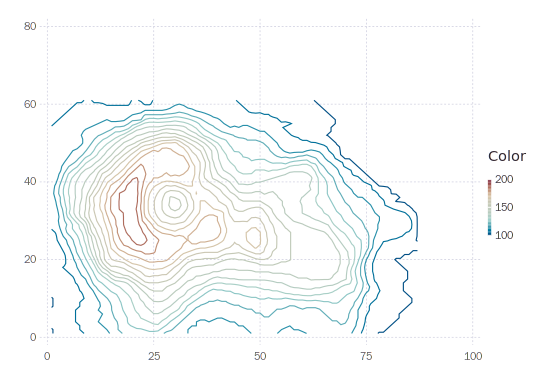

In [74]:
volcano = convert(Array{Float64}, dataset("datasets", "volcano"))
plot(z=volcano, Geom.contour)

#### 數值對類別型資料

盒狀圖的X軸是類別型資料，Y軸則是數值資料，我們可以比較不同類別間的分佈趨勢

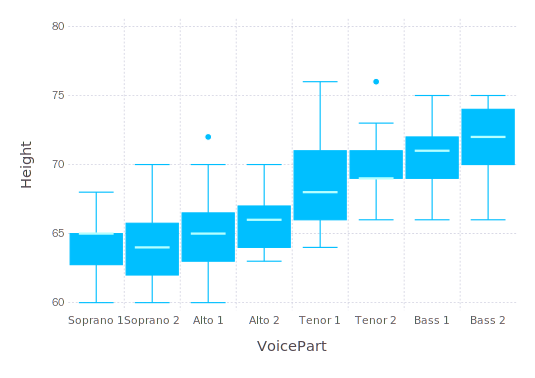

In [75]:
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.boxplot)

類似於盒狀圖，但是可以更清楚看到分佈的情況

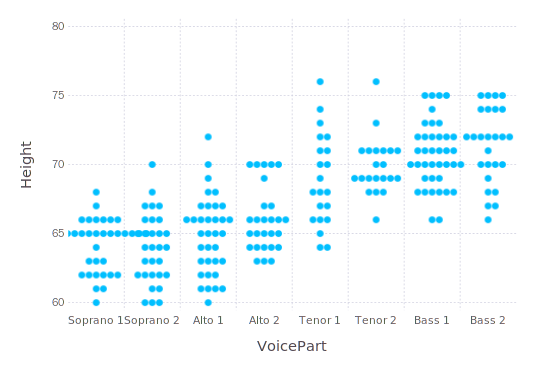

In [76]:
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.beeswarm)

#### Violin plot

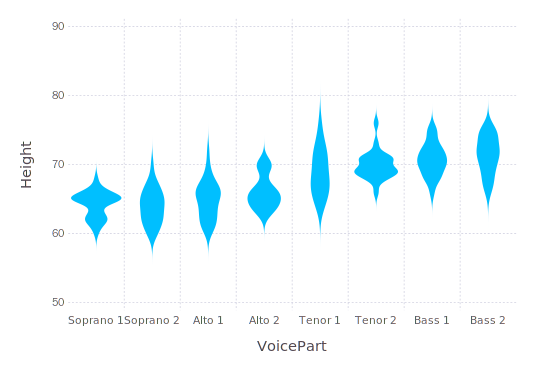

In [77]:
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.violin)

#### 類別對類別資料

X跟Y都是類別，以顏色表達第3個維度的數值

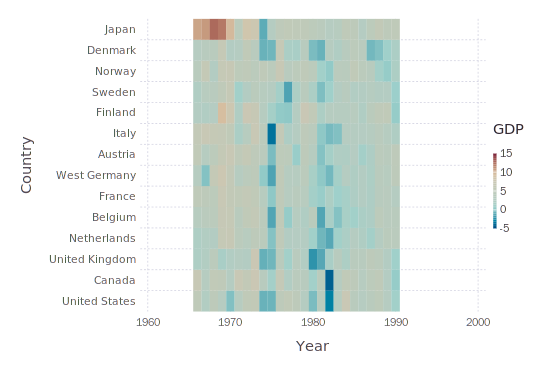

In [78]:
plot(dataset("Zelig", "macro"), x="Year", y="Country", color="GDP", Geom.rectbin)

# Q & A